# Auto Machine Learning with H20 Auto ML

Importing packages

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data loading

In [3]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [4]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [5]:
customer_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_histo = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_histo = pd.read_excel(xls, 'MARKETING HISTORY')
sub_histo = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [6]:
customer_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [7]:
loan_histo.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [8]:
marketing_histo.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [9]:
sub_histo.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [10]:
df = pd.merge(customer_info, loan_histo, on = 'ID')
df = pd.merge(df, marketing_histo, on = 'ID')
df = pd.merge(df, sub_histo, on = 'ID')

In [11]:
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df = df.drop('ID', axis=1)

Data prep & h2o cluster init

In [13]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 18.0.2+9-61, mixed mode, sharing)
  Starting server from E:\Python\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\valen\AppData\Local\Temp\tmppn9rqiru
  JVM stdout: C:\Users\valen\AppData\Local\Temp\tmppn9rqiru\h2o_valen_started_from_python.out
  JVM stderr: C:\Users\valen\AppData\Local\Temp\tmppn9rqiru\h2o_valen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_valen_irbvzp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.988 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [14]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432809,,,,,1362.272057685082,,,,15.806418791886935,,258.1630797814693,2.7638406582468984,40.1978279622216,0.5803233726305563,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097539,,,,,3044.7658291685234,,,,8.32247615304459,,257.5278122651711,3.0980208832791796,100.1287459905981,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [16]:
train, test = h2o_df.split_frame(ratios = [0.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

Run H2o Auto ML

In [17]:
from h2o.automl import H2OAutoML

In [18]:
df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

Our output variable is slightly unbalanced.

In [19]:
aml = H2OAutoML(max_runtime_secs=30,
                balance_classes=True, #to address unbalanced output class
                stopping_metric='logloss',
                project_name='Final',
                seed = 64)

%time aml.train(x=x, y=y, training_frame = train)

AutoML progress: |
14:47:09.231: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
CPU times: total: 703 ms
Wall time: 31.9 s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220810_144709

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03780832386637975
RMSE: 0.19444362644833527
LogLoss: 0.12948600882681618
Null degrees of freedom: 10050
Residual degrees of freedom: 10045
Null deviance: 7222.6483735638285
Residual deviance: 2602.927749436658
AIC: 2614.927749436658
AUC: 0.9812915118766182
AUCPR: 0.8830450658577661
Gini: 0.9625830237532365

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4359174082554282: 


,,no,yes,Error,Rate
0,no,8591.0,292.0,0.0329,(292.0/8883.0)
1,yes,225.0,943.0,0.1926,(225.0/1168.0)
2,Total,8816.0,1235.0,0.0514,(517.0/10051.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.435917,0.784852,167.0
1,max f2,0.257115,0.846956,234.0
2,max f0point5,0.564814,0.825431,118.0
3,max accuracy,0.484281,0.951448,149.0
4,max precision,0.936261,1.000000,0.0
5,max recall,0.034753,1.000000,349.0
6,max specificity,0.936261,1.000000,0.0
7,max absolute_mcc,0.484281,0.757298,149.0
8,max min_per_class_accuracy,0.263570,0.927226,231.0
9,max mean_per_class_accuracy,0.191443,0.932848,261.0



Gains/Lift Table: Avg response rate: 11,62 %, avg score: 12,13 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010049,0.847843,8.605308,8.605308,1.000000,0.874752,1.000000,0.874752,0.086473,0.086473,760.530822,760.530822,0.086473
1,2,0.020098,0.795475,8.520107,8.562708,0.990099,0.818553,0.995050,0.846652,0.085616,0.172089,752.010715,756.270768,0.171976
2,3,0.030047,0.751404,8.433202,8.519825,0.980000,0.773045,0.990066,0.822279,0.083904,0.255993,743.320205,751.982502,0.255655
3,4,0.040096,0.716613,8.349705,8.477189,0.970297,0.734714,0.985112,0.800334,0.083904,0.339897,734.970500,747.718949,0.339222
4,5,0.050045,0.686797,7.658724,8.314473,0.890000,0.701079,0.966203,0.780601,0.076199,0.416096,665.872432,731.447275,0.414182
5,6,0.100090,0.510754,6.107545,7.211009,0.709742,0.601799,0.837972,0.691200,0.305651,0.721747,510.754480,621.100878,0.703397
6,7,0.150035,0.332335,3.239847,5.889044,0.376494,0.424171,0.684350,0.602308,0.161815,0.883562,223.984712,488.904382,0.829976
7,8,0.200080,0.185069,1.608149,4.818288,0.186879,0.254138,0.559920,0.515223,0.080479,0.964041,60.814905,381.828794,0.864413
8,9,0.300070,0.052173,0.342500,3.326853,0.039801,0.104392,0.386605,0.378325,0.034247,0.998288,-65.750017,232.685324,0.790025
9,10,0.400060,0.021355,0.017125,2.499627,0.001990,0.033530,0.290475,0.292147,0.001712,1.000000,-98.287501,149.962696,0.678825




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.06108102435389737
RMSE: 0.24714575528197397
LogLoss: 0.1948587361625152
Null degrees of freedom: 33930
Residual degrees of freedom: 33926
Null deviance: 24423.372012255382
Residual deviance: 13223.503553460607
AIC: 13233.503553460607
AUC: 0.9360314028186802
AUCPR: 0.6337308754384763
Gini: 0.8720628056373605

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3084305795174056: 


,,no,yes,Error,Rate
0,no,27677.0,2302.0,0.0768,(2302.0/29979.0)
1,yes,1065.0,2887.0,0.2695,(1065.0/3952.0)
2,Total,28742.0,5189.0,0.0992,(3367.0/33931.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.308431,0.631660,212.0
1,max f2,0.106538,0.739258,302.0
2,max f0point5,0.476951,0.614583,146.0
3,max accuracy,0.476951,0.910465,146.0
4,max precision,0.917613,1.000000,0.0
5,max recall,0.003606,1.000000,395.0
6,max specificity,0.917613,1.000000,0.0
7,max absolute_mcc,0.215686,0.584914,250.0
8,max min_per_class_accuracy,0.147070,0.866073,281.0
9,max mean_per_class_accuracy,0.101515,0.872602,305.0



Gains/Lift Table: Avg response rate: 11,65 %, avg score: 11,65 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010020,0.813546,7.095894,7.095894,0.826471,0.853697,0.826471,0.853697,0.071103,0.071103,609.589411,609.589411,0.069135
1,2,0.020011,0.757984,6.635617,6.866095,0.772861,0.784723,0.799705,0.819261,0.066296,0.137399,563.561708,586.609453,0.132862
2,3,0.030002,0.713744,6.306369,6.679703,0.734513,0.735107,0.777996,0.791237,0.063006,0.200405,530.636890,567.970260,0.192866
3,4,0.040022,0.672631,5.858532,6.474108,0.682353,0.693258,0.754050,0.766706,0.058704,0.259109,485.853179,547.410755,0.247968
4,5,0.050013,0.638334,4.938723,6.167392,0.575221,0.655911,0.718326,0.744573,0.049342,0.308451,393.872264,516.739248,0.292507
5,6,0.100027,0.480019,4.710289,5.438841,0.548615,0.560463,0.633471,0.652518,0.235577,0.544028,371.028908,443.884078,0.502533
6,7,0.150010,0.316215,3.568971,4.815796,0.415684,0.400094,0.560904,0.568410,0.178391,0.722419,256.897078,381.579569,0.647867
7,8,0.200024,0.183202,2.256487,4.175874,0.262817,0.246282,0.486371,0.487866,0.112854,0.835273,125.648650,317.587412,0.718992
8,9,0.300021,0.056172,1.113393,3.155147,0.129679,0.107826,0.367485,0.361199,0.111336,0.946609,11.339314,215.514740,0.731826
9,10,0.400018,0.022305,0.334018,2.449917,0.038904,0.035779,0.285346,0.279850,0.033401,0.980010,-66.598206,144.991700,0.656450




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.900185,0.005013,0.906619,0.901666,0.899247,0.892715,0.900680
1,auc,0.936110,0.003028,0.935365,0.936557,0.931652,0.936950,0.940027
2,err,0.099815,0.005013,0.093381,0.098334,0.100753,0.107285,0.099320
3,err_count,677.400000,35.592133,632.000000,661.000000,696.000000,726.000000,672.000000
4,f0point5,0.583253,0.015948,0.593462,0.599756,0.558328,0.579362,0.585356
5,f1,0.634056,0.016717,0.631272,0.641346,0.606780,0.650626,0.640257
6,f2,0.695240,0.030537,0.674227,0.689132,0.664439,0.741879,0.706522
7,lift_top_group,7.080132,0.061343,7.016434,7.034933,7.170032,7.108193,7.071066
8,logloss,0.194870,0.003988,0.191922,0.199439,0.193717,0.198673,0.190597
9,max_per_class_error,0.256383,0.046728,0.293734,0.274847,0.290621,0.181598,0.241117



See the whole table with table.as_data_frame()


Models leaderboard exploration & ensemble exploration

In [20]:
leaderboard = aml.leaderboard
leaderboard.head(rows = leaderboard.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20220810_144709,0.936031,0.194859,0.633731,0.173135,0.247146,0.061081
StackedEnsemble_BestOfFamily_2_AutoML_1_20220810_144709,0.935616,0.195471,0.629934,0.180381,0.247503,0.0612578
StackedEnsemble_BestOfFamily_3_AutoML_1_20220810_144709,0.935607,0.195428,0.629337,0.178891,0.247589,0.0613003
GBM_1_AutoML_1_20220810_144709,0.935483,0.203129,0.629916,0.174306,0.253139,0.0640795
StackedEnsemble_BestOfFamily_1_AutoML_1_20220810_144709,0.935461,0.195574,0.630012,0.174686,0.247708,0.0613594
GBM_3_AutoML_1_20220810_144709,0.931332,0.215304,0.627028,0.168467,0.260675,0.0679517
GBM_2_AutoML_1_20220810_144709,0.930889,0.225145,0.617746,0.174773,0.26624,0.0708839
GBM_4_AutoML_1_20220810_144709,0.927657,0.223926,0.607035,0.170423,0.266127,0.0708235
GBM_5_AutoML_1_20220810_144709,0.921888,0.262682,0.588242,0.187942,0.285447,0.0814798
GLM_1_AutoML_1_20220810_144709,0.908757,0.235778,0.562173,0.206297,0.264256,0.0698311


In [21]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

e:\Python\lib\site-packages\h2o\estimators\stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [22]:
metalearner.varimp()

[('GBM_1_AutoML_1_20220810_144709',
  1.470206618309021,
  1.0,
  0.6916311898808131),
 ('GBM_3_AutoML_1_20220810_144709',
  0.373844712972641,
  0.25428039046826206,
  0.17586824902292184),
 ('GBM_2_AutoML_1_20220810_144709',
  0.20092813670635223,
  0.1366665978809513,
  0.09452288170936494),
 ('DRF_1_AutoML_1_20220810_144709',
  0.07573088258504868,
  0.051510367074902454,
  0.03562617647121224),
 ('GLM_1_AutoML_1_20220810_144709',
  0.004998610820621252,
  0.0033999376403096833,
  0.00235150291568795),
 ('GBM_4_AutoML_1_20220810_144709', 0.0, 0.0, 0.0)]

Deep dive into the best learner

In [23]:
model = h2o.get_model('GBM_1_AutoML_1_20220810_144709')

In [24]:
model.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.06689319344030366
RMSE: 0.2586371849527899
LogLoss: 0.21008820765872507
Mean Per-Class Error: 0.1602591390221194
AUC: 0.9328950635676461
AUCPR: 0.6030056787514387
Gini: 0.8657901271352921

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16740247678373482: 


,,no,yes,Error,Rate
0,no,9002.0,941.0,0.0946,(941.0/9943.0)
1,yes,302.0,1035.0,0.2259,(302.0/1337.0)
2,Total,9304.0,1976.0,0.1102,(1243.0/11280.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.167402,0.624811,256.0
1,max f2,0.065949,0.731678,318.0
2,max f0point5,0.365590,0.601293,167.0
3,max accuracy,0.375094,0.906294,163.0
4,max precision,0.776862,0.833333,14.0
5,max recall,0.005965,1.000000,383.0
6,max specificity,0.871036,0.999899,0.0
7,max absolute_mcc,0.161508,0.577803,260.0
8,max min_per_class_accuracy,0.095943,0.859197,299.0
9,max mean_per_class_accuracy,0.048049,0.868205,332.0



Gains/Lift Table: Avg response rate: 11,85 %, avg score:  9,01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010018,0.715934,6.570250,6.570250,0.778761,0.768818,0.778761,0.768818,0.065819,0.065819,557.025040,557.025040,0.063305
1,2,0.020035,0.654085,5.823631,6.196941,0.690265,0.685870,0.734513,0.727344,0.058340,0.124159,482.363103,519.694071,0.118124
2,3,0.030053,0.606581,5.823631,6.072504,0.690265,0.632263,0.719764,0.695650,0.058340,0.182498,482.363103,507.250415,0.172944
3,4,0.040071,0.558054,5.077012,5.823631,0.601770,0.582025,0.690265,0.667244,0.050860,0.233358,407.701167,482.363103,0.219278
4,5,0.050000,0.521148,5.498985,5.759162,0.651786,0.539679,0.682624,0.641912,0.054600,0.287958,449.898493,475.916230,0.269956
5,6,0.100000,0.353160,4.727001,5.243082,0.560284,0.437675,0.621454,0.539794,0.236350,0.524308,372.700075,424.308153,0.481363
6,7,0.150000,0.225054,3.530292,4.672152,0.418440,0.288959,0.553783,0.456182,0.176515,0.700823,253.029170,367.215158,0.624890
7,8,0.200000,0.127958,2.273747,4.072550,0.269504,0.170066,0.482713,0.384653,0.113687,0.814510,127.374720,307.255049,0.697141
8,9,0.300000,0.040333,1.278983,3.141361,0.151596,0.075704,0.372340,0.281670,0.127898,0.942408,27.898280,214.136126,0.728791
9,10,0.400000,0.016042,0.426328,2.462603,0.050532,0.025636,0.291888,0.217662,0.042633,0.985041,-57.367240,146.260284,0.663710


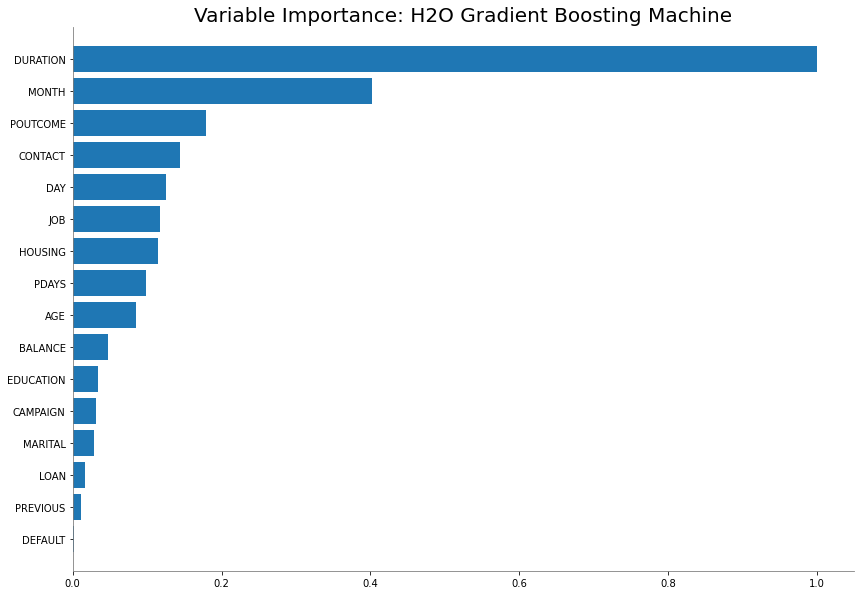

<Figure size 432x288 with 0 Axes>

In [26]:
model.varimp_plot(num_of_features=20)